# Titanic dataset

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

## Clean Dataset
### import data & remove useless columns

In [2]:
data = pd.read_csv("data/train.csv")
dataset = data[:].drop("Ticket", axis=1).drop(["Cabin", "Name", "PassengerId"], axis=1)

In [3]:
sex_mapping = {"male": 1, "female": 2}
dataset['Sex'] = dataset['Sex'].map(sex_mapping)
dataset['Sex'] = dataset['Sex'].fillna(0)

In [4]:
dataset["Age"] = data["Age"].fillna(data["Age"].mean())

In [5]:
dataset["family_size"] = data["SibSp"] + data["Parch"]
dataset.drop(['Parch', 'SibSp'], axis=1, inplace=True)

In [6]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)
dataset['Embarked'] = dataset['Embarked'].fillna(0)

In [7]:
dataset['Fare'].fillna(dataset['Fare'].dropna().median(), inplace=True)

### manage title

In [8]:
dataset['Title'] = data["Name"].str.extract(' ([A-Za-z]+)\.', expand=False)

### Separate features and targets

In [9]:
X = dataset[:].drop('Survived', axis=1)
y = dataset['Survived']

In [10]:
X.head()

,Pclass,Sex,Age,Fare,Embarked,family_size,Title
0,3,1,22.0,7.2500,1.0,1,Mr
1,1,2,38.0,71.2833,2.0,1,Mrs
2,3,2,26.0,7.9250,1.0,0,Miss
3,1,2,35.0,53.1000,1.0,1,Mrs
4,3,1,35.0,8.0500,1.0,0,Mr


## Analyse Dataset
### Analyse age

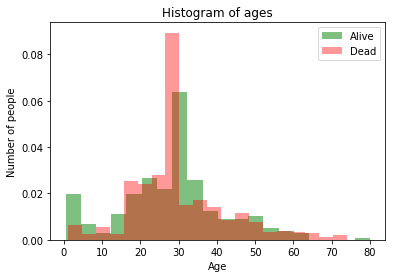

In [11]:
plt.hist(dataset.loc[y == 1, "Age"], color="green", label="Alive", alpha=0.5, bins=20, density=True)
plt.hist(dataset.loc[y == 0, "Age"], color="red", label="Dead", alpha=0.4, bins=20, density=True)

plt.title('Histogram of ages')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.legend(loc='upper right')

plt.show()


*Conclusion of the histogram => * We should consider "Age" feature in our model

### Analyse Title

In [12]:
dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Capt,0.000000
1,Col,0.500000
2,Countess,1.000000
3,Don,0.000000
4,Dr,0.428571
5,Jonkheer,0.000000
6,Lady,1.000000
7,Major,0.500000
8,Master,0.575000
9,Miss,0.697802


In [13]:
# replace rare title to normalize
dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [14]:
dataset[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [15]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
dataset['Title'] = dataset['Title'].map(title_mapping)
dataset['Title'] = dataset['Title'].fillna(0)

dataset.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size,Title
0,0,3,1,22.0,7.2500,1.0,1,1
1,1,1,2,38.0,71.2833,2.0,1,3
2,1,3,2,26.0,7.9250,1.0,0,2
3,1,1,2,35.0,53.1000,1.0,1,3
4,0,3,1,35.0,8.0500,1.0,0,1


*Conclusion of the histogram => * We should consider "Title" feature in our model